In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc


In [2]:
iris = pd.DataFrame(pd.read_csv('iris.csv'));
print(iris)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [8]:
X_train,X_test,y_train,y_test=train_test_split(iris.drop('species',axis=1),iris['species'],test_size=0.2)
model=SVC(kernel='rbf')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print(acc)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.9666666666666667
[[12  0  0]
 [ 0 13  1]
 [ 0  0  4]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.80      1.00      0.89         4

       accuracy                           0.97        30
      macro avg       0.93      0.98      0.95        30
   weighted avg       0.97      0.97      0.97        30



In [10]:
X_train,X_test,y_train,y_test=train_test_split(iris.drop('species',axis=1),iris['species'],test_size=0.2)
model=SVC(kernel='linear')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print(acc)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

1.0
[[12  0  0]
 [ 0  9  0]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [11]:
lr=pd.DataFrame(pd.read_csv('letter-recognition.csv'));
print(lr)

      letter  xbox   ybox   width   height  onpix   xbar   ybar   x2bar  \
0          T      2      8       3       5       1      8     13      0   
1          I      5     12       3       7       2     10      5      5   
2          D      4     11       6       8       6     10      6      2   
3          N      7     11       6       6       3      5      9      4   
4          G      2      1       3       1       1      8      6      6   
...      ...    ...    ...     ...     ...     ...    ...    ...    ...   
19995      D      2      2       3       3       2      7      7      7   
19996      C      7     10       8       8       4      4      8      6   
19997      T      6      9       6       7       5      6     11      3   
19998      S      2      3       4       2       1      8      7      2   
19999      A      4      9       6       6       2      9      5      3   

       y2bar   xybar   x2ybar  xy2bar  xedge   xedgey  yedge   yedgex  
0           6       6      

In [13]:
X_train,X_test,y_train,y_test=train_test_split(lr.drop('letter',axis=1),lr['letter'],test_size=0.2)
model=SVC(kernel='rbf')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print(acc)

0.92425


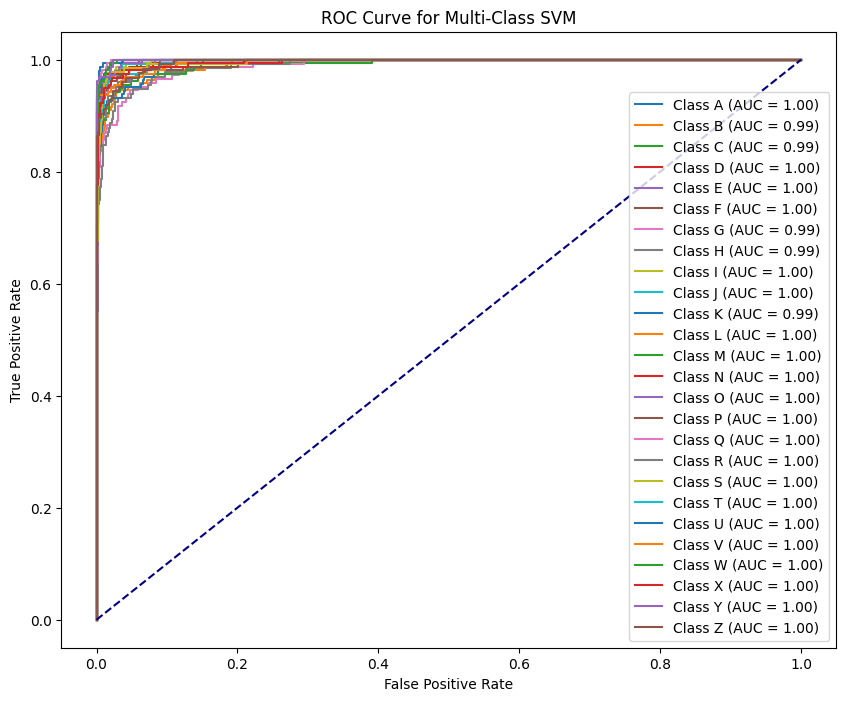

AUC for class A: 1.00
AUC for class B: 0.99
AUC for class C: 0.99
AUC for class D: 1.00
AUC for class E: 1.00
AUC for class F: 1.00
AUC for class G: 0.99
AUC for class H: 0.99
AUC for class I: 1.00
AUC for class J: 1.00
AUC for class K: 0.99
AUC for class L: 1.00
AUC for class M: 1.00
AUC for class N: 1.00
AUC for class O: 1.00
AUC for class P: 1.00
AUC for class Q: 1.00
AUC for class R: 1.00
AUC for class S: 1.00
AUC for class T: 1.00
AUC for class U: 1.00
AUC for class V: 1.00
AUC for class W: 1.00
AUC for class X: 1.00
AUC for class Y: 1.00
AUC for class Z: 1.00


In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

lr = pd.DataFrame(pd.read_csv('letter-recognition.csv'))
X_train, X_test, y_train, y_test = train_test_split(lr.drop('letter', axis=1), lr['letter'], test_size=0.2)

model = OneVsRestClassifier(SVC(kernel='rbf', probability=True))

model.fit(X_train, y_train)

y_score = model.predict_proba(X_test)

lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

fpr, tpr, roc_auc = {}, {}, {}
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {lb.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class SVM')
plt.legend(loc='lower right')
plt.show()

for i in range(n_classes):
    print(f'AUC for class {lb.classes_[i]}: {roc_auc[i]:.2f}')

